## **Book Recommender**

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mohamedashraf2204","key":"dc8220ec22355fac6c596c3b19ba4a60"}'}

In [3]:
# Step 1: Setup Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the dataset from Kaggle
!kaggle datasets download -d dylanjcastillo/7k-books-with-metadata

# Step 3: Unzip the dataset
!unzip 7k-books-with-metadata.zip -d 7k-books-with-metadata

Dataset URL: https://www.kaggle.com/datasets/dylanjcastillo/7k-books-with-metadata
License(s): CC0-1.0
  0% 0.00/1.47M [00:00<?, ?B/s]
100% 1.47M/1.47M [00:00<00:00, 505MB/s]
Archive:  7k-books-with-metadata.zip
  inflating: 7k-books-with-metadata/books.csv  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('7k-books-with-metadata/books.csv')

df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


## **Data Exploration**

In [6]:
print(df.shape)

(6810, 12)


In [7]:
print(df.dtypes)

isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object


In [8]:
print(df.head())

          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.go

In [9]:
print(df.describe(include='all'))

              isbn13      isbn10                  title subtitle  \
count   6.810000e+03        6810                   6810     2381   
unique           NaN        6810                   6398     2009   
top              NaN  9042003405  The Lord of the Rings  A Novel   
freq             NaN           1                     11      226   
mean    9.780677e+12         NaN                    NaN      NaN   
std     6.068911e+08         NaN                    NaN      NaN   
min     9.780002e+12         NaN                    NaN      NaN   
25%     9.780330e+12         NaN                    NaN      NaN   
50%     9.780553e+12         NaN                    NaN      NaN   
75%     9.780810e+12         NaN                    NaN      NaN   
max     9.789042e+12         NaN                    NaN      NaN   

                authors categories  \
count              6738       6711   
unique             3780        567   
top     Agatha Christie    Fiction   
freq                 37       2

In [10]:
print(df.isnull().sum())

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64


## **Exploratory Data Visualization**

Text(0.5, 1.0, 'Distribution of Average Rating')

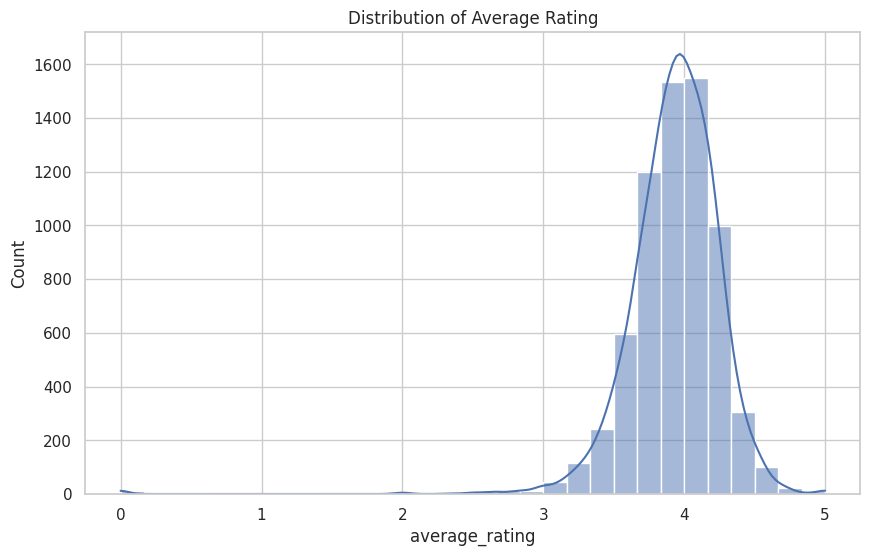

In [11]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Rating')

Text(0.5, 1.0, 'Pages Distribution (with outliers)')

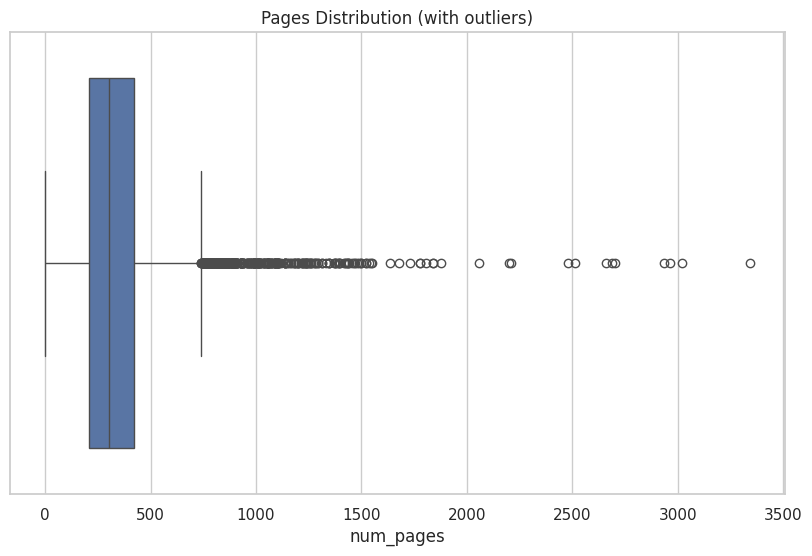

In [12]:
sns.boxplot(x=df['num_pages'])
plt.title('Pages Distribution (with outliers)')

Text(0.5, 1.0, 'Top 10 categories')

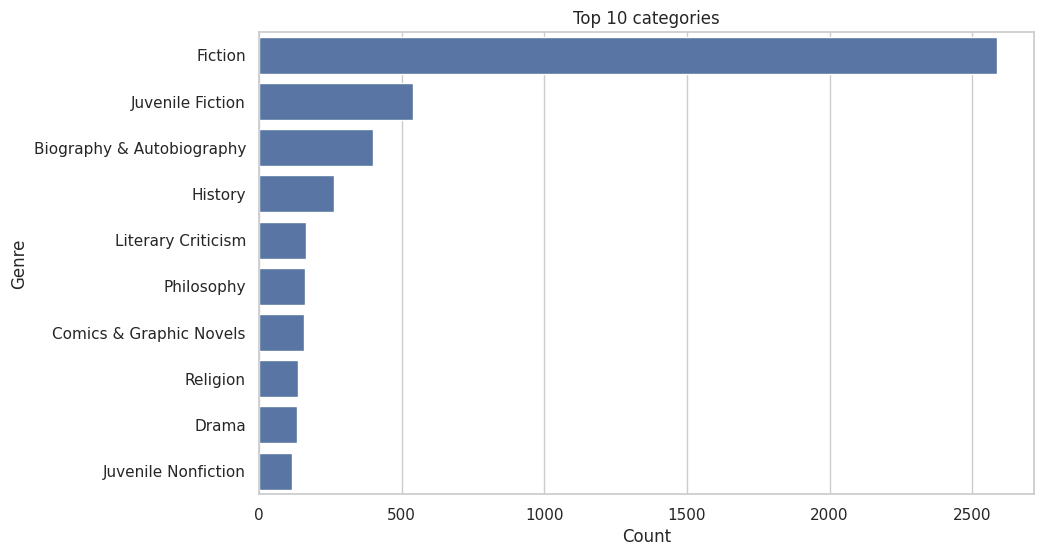

In [13]:
top_genres = df['categories'].value_counts().nlargest(10)
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 categories')

Text(0.5, 1.0, 'Rating vs Pages')

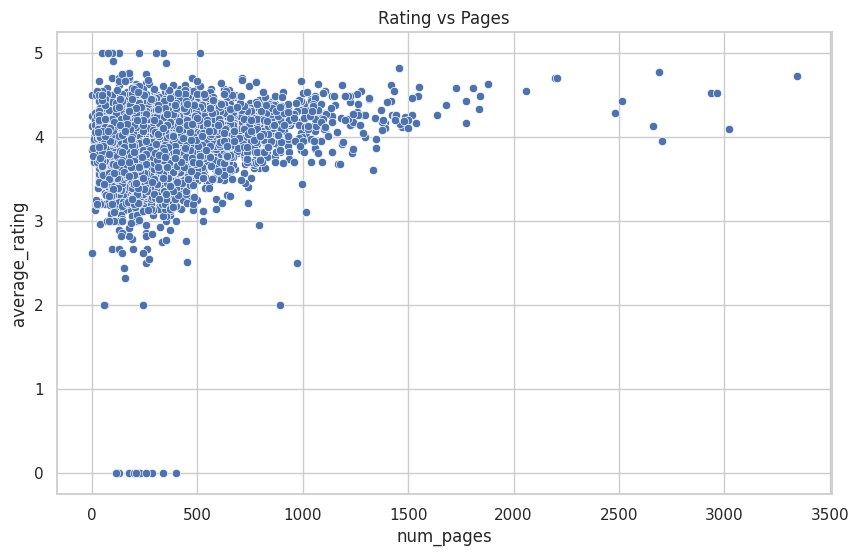

In [14]:
sns.scatterplot(x='num_pages', y='average_rating', data=df)
plt.title('Rating vs Pages')

Text(0.5, 1.0, 'Average Rating Over Publication Years')

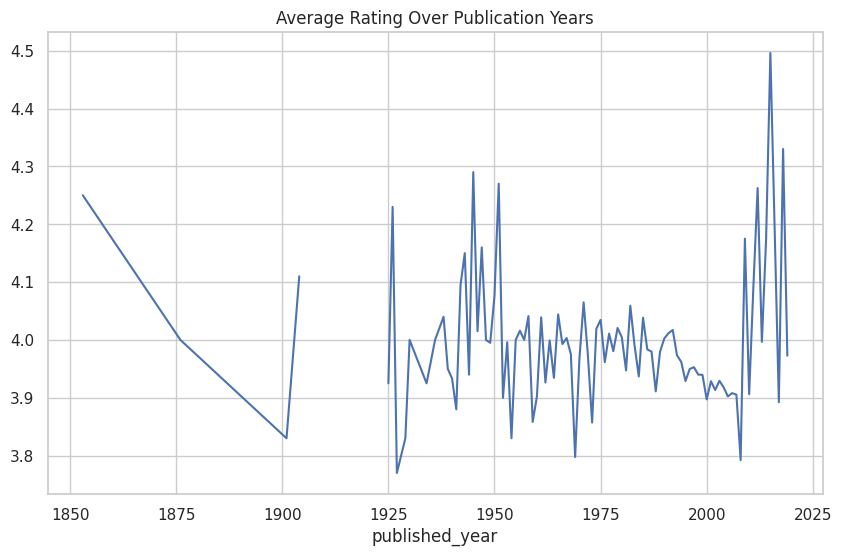

In [15]:
df.groupby('published_year')['average_rating'].mean().plot()
plt.title('Average Rating Over Publication Years')

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

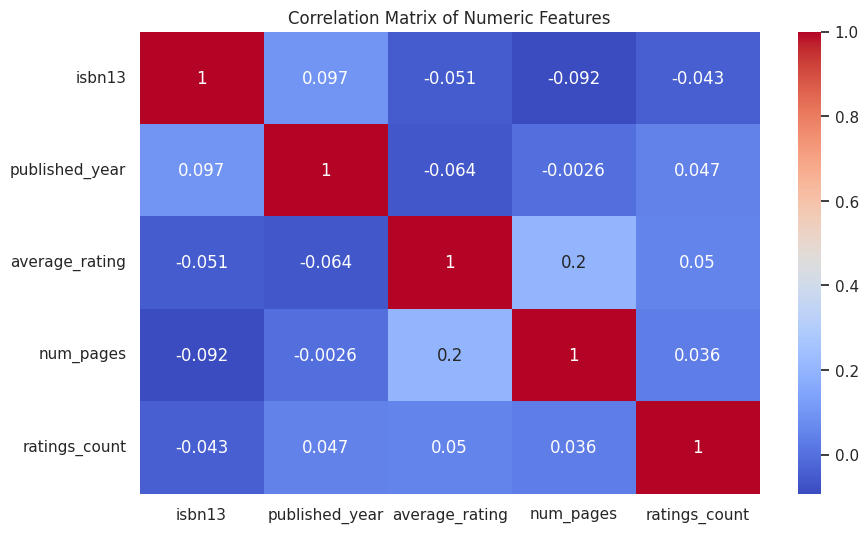

In [16]:
numeric = df.select_dtypes(include=['int64','float64'])
corr = numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')

In [17]:
df = df.drop(columns=['subtitle'])

df = df.dropna(subset=['description'])

In [18]:
df["tagged_description"] = df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [19]:
df

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,9780002261982 A new 'Christie for Christmas' -...
2,9780006163831,0006163831,The One Tree,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,9780006163831 Volume Two of Stephen Donaldson'...
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,9780006280897 Lewis' work on the nature of lov...
...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,9788185300535 This collection of the timeless ...
6808,9789027712059,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,9789027712059 Since the three volume edition o...


## **Building Vector database**

In [30]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma

In [31]:
df["tagged_description"].to_csv("tagged_description.txt", sep = "\n", index = False, header = False)

In [32]:
raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=1, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(raw_documents)

Streaming output truncated to the last 5000 lines.


In [33]:
# Load a free open-source embedding model from HuggingFace
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Create Chroma vector DB from documents
db_books = Chroma.from_documents(
    documents,
    embedding=embeddings
)

/tmp/ipython-input-488381658.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or d

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [36]:
def retrieve_semantic_recommendations(
        query: str,
        top_k: int = 10,
) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k = 10)

    books_list = []

    for i in range(0, len(recs)):
        books_list += [int(recs[i].page_content.strip('"').split()[0])]

    return df[df["isbn13"].isin(books_list)]

In [43]:
retrieve_semantic_recommendations("A book about  history")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,tagged_description
210,9780060593247,0060593245,Every Book Its Reader,Nicholas A. Basbanes,Literary Criticism,http://books.google.com/books/content?id=o4K_K...,Inspired by a landmark exhibition mounted by t...,2006.0,3.96,400.0,300.0,9780060593247 Inspired by a landmark exhibitio...
292,9780060841867,0060841869,The Curtain,Milan Kundera,Literary Collections,http://books.google.com/books/content?id=JCDXP...,Traces the author's personal view of the histo...,2006.0,3.96,176.0,1351.0,9780060841867 Traces the author's personal vie...
334,9780060921088,0060921080,Declarations of Independence,Howard Zinn,Political science,http://books.google.com/books/content?id=f1wmv...,The acclaimed author of A People's History of ...,1991.0,4.26,341.0,720.0,9780060921088 The acclaimed author of A People...
1031,9780143036357,0143036351,Why I Write,George Orwell,Language Arts & Disciplines,http://books.google.com/books/content?id=6I_qP...,"Throughout history, some books have changed th...",2005.0,4.03,120.0,5874.0,"9780143036357 Throughout history, some books h..."
3056,9780451528308,0451528301,Ten Great Works of Philosophy,Robert Paul Wolff,Fiction,http://books.google.com/books/content?id=uMxnF...,"From ancient Greece to 19th-century America, t...",2002.0,3.82,592.0,85.0,9780451528308 From ancient Greece to 19th-cent...
3118,9780465024964,0465024963,The Classical World,Robin Lane Fox,History,http://books.google.com/books/content?id=Srhcj...,"Armies and empires, statesmen and tyrants--the...",2005.0,3.92,672.0,1222.0,"9780465024964 Armies and empires, statesmen an..."
5847,9781405823517,1405823518,The Pursuit of History,John Tosh;Sean Lang,History,http://books.google.com/books/content?id=L9x8Z...,Theessential introduction to the practice of h...,2006.0,3.45,357.0,354.0,9781405823517 Theessential introduction to the...
6090,9781565841000,156584100X,Lies My Teacher Told Me,James W. Loewen,Education,http://books.google.com/books/content?id=dW6no...,Criticizes the way history is presented in cur...,1995.0,3.96,384.0,398.0,9781565841000 Criticizes the way history is pr...
6409,9781593083779,1593083777,Swann's Way,Marcel Proust;Elizabeth Dalton,Fiction,http://books.google.com/books/content?id=wHUIr...,Presents the first book of Proust's monumental...,2005.0,4.14,466.0,18.0,9781593083779 Presents the first book of Prous...
6803,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,9788173031014 This book tells the tale of a ma...


In [44]:
# # Install necessary libraries if not already installed
# !pip install -q kaggle langchain langchain-community langchain-chroma langchain-text-splitters sentence-transformers gradio huggingface-hub chromadb

# from google.colab import files
# files.upload()  # Upload kaggle.json

# Step 1: Setup Kaggle API credentials
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# # Step 2: Download the dataset from Kaggle
# !kaggle datasets download -d dylanjcastillo/7k-books-with-metadata

# # Step 3: Unzip the dataset
# !unzip 7k-books-with-metadata.zip -d 7k-books-with-metadata

# import pandas as pd
import os

# df = pd.read_csv('7k-books-with-metadata/books.csv')

# # Data Cleaning
# df = df.drop(columns=['subtitle'])
# df = df.dropna(subset=['description'])
# df["tagged_description"] = df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

# # Save to text file
# df["tagged_description"].to_csv("tagged_description.txt", sep="\n", index=False, header=False)

# # Build Vector Database (only once)
# from langchain_community.document_loaders import TextLoader
# from langchain_text_splitters import CharacterTextSplitter
# from langchain_community.embeddings import HuggingFaceEmbeddings
# from langchain_chroma import Chroma

# Define persist directory
persist_directory = "chroma_db_books"

# Check if DB exists, load if yes, else build
if os.path.exists(persist_directory):
    print("Loading existing Chroma DB...")
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    db_books = Chroma(persist_directory=persist_directory, embedding_function=embeddings)
else:
    print("Building Chroma DB...")
    raw_documents = TextLoader("tagged_description.txt").load()
    text_splitter = CharacterTextSplitter(chunk_size=1, chunk_overlap=0, separator="\n")
    documents = text_splitter.split_documents(raw_documents)
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    db_books = Chroma.from_documents(
        documents,
        embedding=embeddings,
        persist_directory=persist_directory
    )

def retrieve_semantic_recommendations(query: str, top_k: int = 10) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k=top_k)
    books_list = []
    for i in range(0, len(recs)):
        # Extract isbn13 from the content (assuming it's the first token)
        content = recs[i].page_content.strip('"')
        isbn_str = content.split()[0]
        try:
            books_list.append(int(isbn_str))
        except ValueError:
            continue  # Skip if not convertible
    recommended_df = df[df["isbn13"].isin(books_list)]
    # Select relevant columns for display
    return recommended_df[['title', 'authors', 'average_rating', 'num_pages', 'published_year', 'categories', 'description']]

# Gradio Interface
import gradio as gr

def recommend_books(query):
    return retrieve_semantic_recommendations(query)

iface = gr.Interface(
    fn=recommend_books,
    inputs=gr.Textbox(label="Enter your book query (e.g., 'A book to teach children about nature')"),
    outputs=gr.Dataframe(label="Recommended Books"),
    title="Book Recommendation App",
    description="Search for book recommendations based on semantic similarity."
)

iface.launch()

Dataset URL: https://www.kaggle.com/datasets/dylanjcastillo/7k-books-with-metadata
License(s): CC0-1.0
7k-books-with-metadata.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  7k-books-with-metadata.zip
replace 7k-books-with-metadata/books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Building Chroma DB...


Streaming output truncated to the last 5000 lines.


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32ab752e645929e36e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
